In [1]:
import sys
sys.path.insert(1, 'games/')
from tic_tac_toe import TicTacToe
from connect2 import Connect2

from model import Model

import platform
import numpy as np
import matplotlib.pyplot as plt

if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display
np.random.seed(42)

In [2]:
game = Connect2()
model = Model((game.nb_actions+1), game.nb_actions, summary=True)
model.load("models/model_connect2.h5")

2021-12-01 01:31:42.478699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 01:31:42.530871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 01:31:42.531127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           192         ['input_1[0][0]']                
                                                                                                  
 policy (Dense)                 (None, 4)            132         ['dense[0][0]']                  
                                                                                                  
 value (Dense)                  (None, 1)            33          ['dense[0][0]']                  
                                                                                              

2021-12-01 01:31:42.532316: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-01 01:31:42.532789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 01:31:42.533037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 01:31:42.533199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
state = game.get_init_state()
model.predict(state)

(array([0.02955498, 0.9187208 , 0.04593055, 0.00579367], dtype=float32),
 0.9477911)

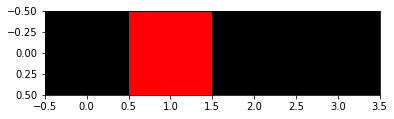

Model prediction: (array([0.38871747, 0.00881788, 0.49163082, 0.11083385], dtype=float32), 0.95864254)
Root value: 0.9673809826374054


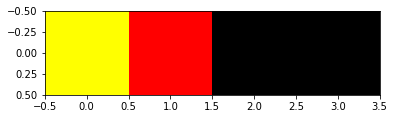

Model prediction: (array([0.03510004, 0.03508582, 0.9282803 , 0.00153383], dtype=float32), 0.9981021)
Root value: 0.9673809826374054


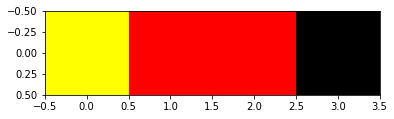

Model prediction: (array([2.3112363e-04, 3.3049157e-04, 9.5273167e-01, 4.6706695e-02],
      dtype=float32), 0.9956786)
Root value: 1.0


In [5]:
state = game.get_init_state()
game.play_vs(model, state, 25)